In [1]:
#KEVIN VERSION 1 - Preliminary code used for group presentation and training the first model
#This is the original code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

df = pd.read_csv('sample data - Sheet1.csv')

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a ColumnTransformer to transform categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the ColumnTransformer on the DataFrame
df_transformed = preprocessor.fit_transform(df)

# Update feature names after one-hot encoding (for older scikit-learn versions)
feature_names = list(numeric_cols)
for col in categorical_cols:
    unique_values = df[col].dropna().unique()
    feature_names.extend([f'{col}_{val}' for val in unique_values])

# Convert the transformed array back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=feature_names)

# Specify gene expression columns
gene_expressions = ['ENSG00000146938_Expression', 'ENSG00000101849_Expression', 'ENSG00000047644_Expression', 'ENSG00000073464_Expression', 'ENSG00000101871_Expression']

# Select features and targets
feature_columns = df_transformed.columns.difference(gene_expressions)
X = df_transformed[feature_columns]
y = df_transformed[gene_expressions]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(5))  # Output layer for 5 gene expressions

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate model
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Model Loss: {loss}')

Epoch 1/100
137/137 [==============================] - 3s 9ms/step - loss: 0.1350 - val_loss: 0.1321
Epoch 2/100
137/137 [==============================] - 1s 7ms/step - loss: 0.1317 - val_loss: 0.1310
Epoch 3/100
137/137 [==============================] - 1s 6ms/step - loss: 0.1313 - val_loss: 0.1317
Epoch 4/100
137/137 [==============================] - 1s 6ms/step - loss: 0.1309 - val_loss: 0.1306
Epoch 5/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1302 - val_loss: 0.1308
Epoch 6/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1301 - val_loss: 0.1295
Epoch 7/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1297 - val_loss: 0.1320
Epoch 8/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1298 - val_loss: 0.1304
Epoch 9/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1297 - val_loss: 0.1308
Epoch 10/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1296 - val_lo

In [2]:
#KEVIN VERSION 2 - Code with Class_weight
#Code with class_weight
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.regularizers import l2

# Load the data
df = pd.read_csv('sample data - Sheet1.csv')

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a ColumnTransformer to transform categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the ColumnTransformer on the DataFrame
df_transformed = preprocessor.fit_transform(df)

# Update feature names after one-hot encoding
feature_names = list(numeric_cols)
for col in categorical_cols:
    unique_values = df[col].dropna().unique()
    feature_names.extend([f'{col}_{val}' for val in unique_values])

# Convert the transformed array back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=feature_names)

# Specify gene expression columns
gene_expressions = ['ENSG00000146938_Expression', 'ENSG00000101849_Expression', 'ENSG00000047644_Expression', 'ENSG00000073464_Expression', 'ENSG00000101871_Expression']

# Select features and targets
feature_columns = df_transformed.columns.difference(gene_expressions)
X = df_transformed[feature_columns]
y = df_transformed[gene_expressions]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input data for CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Class weights (adjust as needed based on your dataset)
class_weights = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}

# Create CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(5, kernel_regularizer=l2(0.01)))  # Output layer for 5 gene expressions

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, class_weight=class_weights, validation_data=(X_test_reshaped, y_test))

# Evaluate model
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Model Loss: {loss}')


Epoch 1/100
137/137 [==============================] - 1s 5ms/step - loss: 0.4132 - val_loss: 0.1764
Epoch 2/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1566 - val_loss: 0.1454
Epoch 3/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1408 - val_loss: 0.1385
Epoch 4/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1368 - val_loss: 0.1357
Epoch 5/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1349 - val_loss: 0.1347
Epoch 6/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1341 - val_loss: 0.1348
Epoch 7/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1338 - val_loss: 0.1339
Epoch 8/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1335 - val_loss: 0.1333
Epoch 9/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1332 - val_loss: 0.1336
Epoch 10/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1332 - val_lo

In [3]:
#KEVIN VERSION 3
# it seems that there might be an imbalance in the 'age_group' category
#This code modification will ensure that the proportions of different age groups are similar in both the training and test sets.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.regularizers import l2

# Load the data
df = pd.read_csv('sample data - Sheet1.csv')

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a ColumnTransformer to transform categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the ColumnTransformer on the DataFrame
df_transformed = preprocessor.fit_transform(df)

# Update feature names after one-hot encoding
feature_names = list(numeric_cols)
for col in categorical_cols:
    unique_values = df[col].dropna().unique()
    feature_names.extend([f'{col}_{val}' for val in unique_values])

# Convert the transformed array back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=feature_names)

# Specify gene expression columns
gene_expressions = ['ENSG00000146938_Expression', 'ENSG00000101849_Expression', 'ENSG00000047644_Expression', 'ENSG00000073464_Expression', 'ENSG00000101871_Expression']

# Select features and targets
feature_columns = df_transformed.columns.difference(gene_expressions)
X = df_transformed[feature_columns]
y = df_transformed[gene_expressions]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified train-test split based on 'age_group'
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=df['age_group'])

# Reshape input data for CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(len(gene_expressions), kernel_regularizer=l2(0.01)))  # Output layer for gene expressions

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate model
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Model Loss: {loss}')


Epoch 1/100
137/137 [==============================] - 2s 8ms/step - loss: 0.4129 - val_loss: 0.1776
Epoch 2/100
137/137 [==============================] - 1s 7ms/step - loss: 0.1576 - val_loss: 0.1448
Epoch 3/100
137/137 [==============================] - 1s 7ms/step - loss: 0.1413 - val_loss: 0.1375
Epoch 4/100
137/137 [==============================] - 1s 6ms/step - loss: 0.1370 - val_loss: 0.1357
Epoch 5/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1354 - val_loss: 0.1341
Epoch 6/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1349 - val_loss: 0.1343
Epoch 7/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1342 - val_loss: 0.1330
Epoch 8/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1341 - val_loss: 0.1329
Epoch 9/100
137/137 [==============================] - 1s 4ms/step - loss: 0.1335 - val_loss: 0.1326
Epoch 10/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1333 - val_lo

In [4]:
#KEVIN VERSION 4 - Included Start & Stop coordinates for genes

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.regularizers import l2

# Load the data
df = pd.read_csv('sample data - Sheet1.csv')

# Identify all genes by looking for unique identifiers in the column names
genes = set(col.split('_')[0] for col in df.columns if '_Start' in col or '_Stop' in col or '_End' in col)

# For each gene, calculate the length as Stop - Start
for gene in genes:
    start_col = f'{gene}_Start'
    stop_col = f'{gene}_Stop' if f'{gene}_Stop' in df.columns else f'{gene}_End'

    # Ensure the start and stop columns are numeric
    df[start_col] = pd.to_numeric(df[start_col], errors='coerce')
    df[stop_col] = pd.to_numeric(df[stop_col], errors='coerce')

    # Create a new column for gene length
    length_col = f'{gene}_Length'
    df[length_col] = df[stop_col] - df[start_col]

# Fill missing values in specific columns with a default value (e.g., 0)
default_value = 0
df.fillna(default_value, inplace=True)

# Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.union([f'{gene}_Length' for gene in genes])

# Create a ColumnTransformer to transform categorical columns and scale numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), list(numeric_cols)),
        ('cat', OneHotEncoder(), list(categorical_cols))
    ])

# Fit and transform the ColumnTransformer on the DataFrame
df_transformed = preprocessor.fit_transform(df)

# Collect feature names from the ColumnTransformer
numeric_features = preprocessor.named_transformers_['num'].get_feature_names_out()
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out()

# Combine all feature names (numeric and categorical)
all_feature_names = list(numeric_features) + list(categorical_features)

# Convert the transformed array back to a DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=all_feature_names)

# Specify gene expression columns
gene_expressions = ['ENSG00000146938_Expression', 'ENSG00000101849_Expression', 'ENSG00000047644_Expression', 'ENSG00000073464_Expression', 'ENSG00000101871_Expression']

# Select features and targets
feature_columns = df_transformed.columns.difference(gene_expressions)
X = df_transformed[feature_columns]
y = df_transformed[gene_expressions]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=df['age_group'])

# Reshape input data for CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(len(gene_expressions), kernel_regularizer=l2(0.01)))  # Output layer for gene expressions

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate model
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Model Loss: {loss}')

Epoch 1/100
137/137 [==============================] - 2s 10ms/step - loss: 0.3866 - val_loss: 0.1712
Epoch 2/100
137/137 [==============================] - 1s 8ms/step - loss: 0.1551 - val_loss: 0.1452
Epoch 3/100
137/137 [==============================] - 1s 7ms/step - loss: 0.1411 - val_loss: 0.1372
Epoch 4/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1369 - val_loss: 0.1359
Epoch 5/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1353 - val_loss: 0.1342
Epoch 6/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1346 - val_loss: 0.1334
Epoch 7/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1342 - val_loss: 0.1331
Epoch 8/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1340 - val_loss: 0.1330
Epoch 9/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1338 - val_loss: 0.1327
Epoch 10/100
137/137 [==============================] - 1s 5ms/step - loss: 0.1335 - val_l

Shapes after reshaping:
X_train_tensor: torch.Size([3275, 11, 1])
y_train_tensor: torch.Size([3275, 5])
X_val_tensor: torch.Size([1092, 11, 1])
y_val_tensor: torch.Size([1092, 5])
X_test_tensor: torch.Size([1092, 11, 1])
y_test_tensor: torch.Size([1092, 5])
Epoch 10/1000, Training Loss: 0.38426119089126587, Validation Loss: 0.23461835086345673
Epoch 20/1000, Training Loss: 0.3312271237373352, Validation Loss: 0.23835992813110352
Epoch 30/1000, Training Loss: 0.2986294627189636, Validation Loss: 0.2394130378961563
Epoch 40/1000, Training Loss: 0.2741817533969879, Validation Loss: 0.23572707176208496
Epoch 50/1000, Training Loss: 0.26096948981285095, Validation Loss: 0.22850297391414642
Epoch 60/1000, Training Loss: 0.24862271547317505, Validation Loss: 0.22128622233867645
Epoch 70/1000, Training Loss: 0.23605915904045105, Validation Loss: 0.21441878378391266
Epoch 80/1000, Training Loss: 0.22766461968421936, Validation Loss: 0.20750214159488678
Epoch 90/1000, Training Loss: 0.2168986797

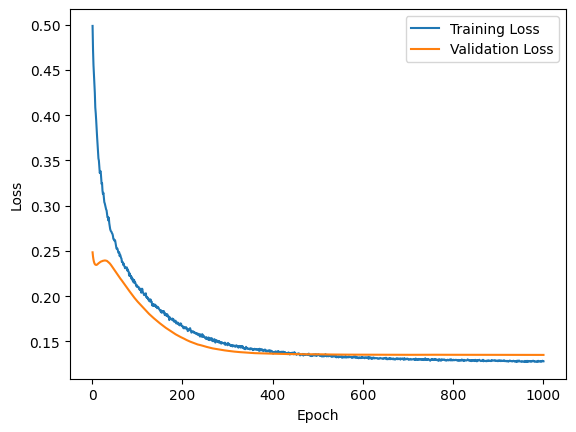

Test Loss: 0.13110452890396118


In [5]:
#IMTIYAZ VERSION 1 - Fixed issues with input features including chromatin accessibility which was not included and gene coordinates; removed scaling;
# fixed CNN input dimensions, ran the model on test dataset for 5 genes, 1000 epochs

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

class CNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, dropout_rate=0.2):
        super(CNNModel, self).__init__()

        self.input_size = input_size  # Set input size during initialization

        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=0)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=0)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.pool2 = nn.MaxPool1d(2)

        # Calculate the size of the linear layer input based on the output size after convolutions
        # conv_output_size = 64 * (((input_size - 2) // 2 - 2) // 2 - 2)
        self.fc1 = nn.Linear(64, hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size + 1, 5)

    def forward(self, x, a):
        x = x.permute(0, 2, 1)

        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))

        x = self.batch_norm3(x)
        x = self.dropout3(x)

        a = a.squeeze(dim=-1)

        #print(x.size(-2),x.size(-1),x.size(0),x.size(1))
        #print(a.size(-2),a.size(-1),a.size(0),a.size(1))

        # Ensure that the size of dimension 1 is consistent


        x = torch.cat([x, a], dim=1)

        x = self.fc2(x)
        return x.view(x.size(0),-1)

class GeneExpressionPredictor:
    def __init__(self, df):
        self.df = df
        self.model = None
        self.input_size = None
        self.X_train_tensor = None
        self.y_train_tensor = None
        self.X_val_tensor = None
        self.y_val_tensor = None
        self.X_test_tensor = None
        self.y_test_tensor = None

    def preprocess_data(self):
        # Identify gene expression columns
        gene_expression_columns = self.df.filter(like='_Expression').columns

        # Specify additional features for each cell
        additional_features = ['age_group', 'sex']

        # Use DataFrame to get additional categorical features
        additional_categorical_features = list(set(additional_features) & set(self.df.columns))

        # Fill missing values in specific columns with a default value (e.g., 0)
        default_value = 0
        self.df.fillna(default_value, inplace=True)

        # Identify chromatin accessibility columns
        chromatin_accessibility_columns = self.df.filter(like='_ChromatinAccessibility').columns

        # Combine all feature names (numeric, categorical, and additional features)
        feature_columns = chromatin_accessibility_columns.union(additional_categorical_features)

        # Select features and target features
        X = self.df[feature_columns].copy()
        y = self.df[gene_expression_columns].copy()

        # Convert categorical columns to one-hot encoding
        X = pd.get_dummies(X, columns=additional_categorical_features)

        # Train-validation-test split
        X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

        # Reshape input data for CNN
        self.X_train_tensor = torch.tensor(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), dtype=torch.float32)
        self.y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

        self.X_val_tensor = torch.tensor(X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1), dtype=torch.float32)
        self.y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

        self.X_test_tensor = torch.tensor(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), dtype=torch.float32)
        self.y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

        print("Shapes after reshaping:")
        print("X_train_tensor:", self.X_train_tensor.shape)
        print("y_train_tensor:", self.y_train_tensor.shape)
        print("X_val_tensor:", self.X_val_tensor.shape)
        print("y_val_tensor:", self.y_val_tensor.shape)
        print("X_test_tensor:", self.X_test_tensor.shape)
        print("y_test_tensor:", self.y_test_tensor.shape)

        self.input_size = X.shape[1]


    def train_model(self, hidden_size=5, dropout_rate=0.2, epochs=1000, batch_size=32):
        model = CNNModel(input_size=self.input_size, hidden_size=hidden_size, dropout_rate=dropout_rate)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Store the training and validation loss for plotting
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            # Training
            model.train()
            optimizer.zero_grad()
            outputs = model(self.X_train_tensor, self.X_train_tensor[:, -1:, :])
            loss = criterion(outputs, self.y_train_tensor)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

            # Validation
            model.eval()
            with torch.no_grad():
                val_outputs = model(self.X_val_tensor, self.X_val_tensor[:, -1:, :])
                val_loss = criterion(val_outputs, self.y_val_tensor)
                val_losses.append(val_loss.item())

            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

        # Plot the training and validation loss
        plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
        plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        self.model = model

    def evaluate_model(self):
        if self.model is None:
            print("Model not trained. Please train the model before evaluation.")
            return

        model = self.model.eval()
        criterion = nn.MSELoss()

        # Evaluate on the test set
        with torch.no_grad():
            test_outputs = model(self.X_test_tensor, self.X_test_tensor[:, -1:, :])
            test_loss = criterion(test_outputs, self.y_test_tensor)

        print(f'Test Loss: {test_loss.item()}')



# Load the data
df = pd.read_csv('sample data - Sheet1.csv')

# Create an instance of GeneExpressionPredictor
gene_predictor = GeneExpressionPredictor(df)

# Preprocess the data
gene_predictor.preprocess_data()

# Train the model
gene_predictor.train_model()

# Evaluate the model
gene_predictor.evaluate_model()


In [ ]:
#IMTIYAZ VERSION 2 - Updated code to work with paired data (RNA+ATAC) rather than pools of data. This code creates one model per gene to predict gene expression from chromatin accessibility data
 #alongside other features. Still not ideal because we want a single model to be able to learn from other genes but at least now there is some specificity with RNA-ATAC pairs.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

class PairedCNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, dropout_rate=0.2, num_genes=5):
        super(PairedCNNModel, self).__init__()

        self.input_size = input_size  # Set input size during initialization

        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=0)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=0)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.pool2 = nn.MaxPool1d(2)

        self.fc1 = nn.Linear(64, hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size + 1, 5)

        # Separate branches for each gene
        self.gene_branches = nn.ModuleList([
            nn.Sequential(
                nn.Linear(64, hidden_size),
                nn.BatchNorm1d(hidden_size),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_size, 1)
            )
            for _ in range(num_genes)
        ])

    def forward(self, x, a):
        x = x.permute(0, 2, 1)

        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), -1)

        # Separate fully connected layer
        x_fc = F.relu(self.fc1(x))
        x_fc = self.batch_norm3(x_fc)
        x_fc = self.dropout3(x_fc)

        # Separate branches for each gene
        gene_predictions = [gene_branch(x) for gene_branch in self.gene_branches]

        # Concatenate the gene-specific predictions
        x = torch.cat(gene_predictions, dim=1)

        return x.view(x.size(0), -1)

class GeneExpressionPredictor:
    def __init__(self, df):
        self.df = df
        self.model = None
        self.input_size = None
        self.gene_data = {}  # Dictionary to store data for each gene

    def preprocess_data(self):
        # Identify gene expression columns
        gene_expression_columns = self.df.filter(like='_Expression').columns

        # Specify additional features for each cell
        additional_features = ['age_group', 'sex']

        # Use DataFrame to get additional categorical features
        additional_categorical_features = list(set(additional_features) & set(self.df.columns))

        # Fill missing values in specific columns with a default value (e.g., 0)
        default_value = 0
        self.df.fillna(default_value, inplace=True)

        # Identify chromatin accessibility columns
        chromatin_accessibility_columns = self.df.filter(like='_ChromatinAccessibility').columns

        # Combine all feature names (numeric, categorical, and additional features)
        feature_columns = chromatin_accessibility_columns.union(additional_categorical_features)

        # Iterate over each gene to create subsets
        for gene in gene_expression_columns:
            # Select features and target features for the current gene
            X_gene = self.df[feature_columns].copy()
            y_gene = self.df[gene].copy()
            #print(y_gene)

            # Convert categorical columns to one-hot encoding
            X_gene = pd.get_dummies(X_gene, columns=additional_categorical_features)

            # Reshape input data for CNN
            X_gene_tensor = torch.tensor(X_gene.values.reshape(X_gene.shape[0], X_gene.shape[1], 1), dtype=torch.float32)
            y_gene_tensor = torch.tensor(y_gene.values, dtype=torch.float32)

            # Store gene-specific data in the dictionary
            self.gene_data[gene] = {'X_tensor': X_gene_tensor, 'y_tensor': y_gene_tensor}

            print(f"Shapes after reshaping for {gene}:")
            print("X_tensor:", X_gene_tensor.shape)
            print("y_tensor:", y_gene_tensor.shape)

        self.input_size = X_gene.shape[1]


    def train_model(self, hidden_size=5, dropout_rate=0.2, epochs=100, batch_size=32):
        for gene, data in self.gene_data.items():
            X_gene_tensor = data['X_tensor']
            y_gene_tensor = data['y_tensor']

            model = PairedCNNModel(input_size=self.input_size, hidden_size=hidden_size, dropout_rate=dropout_rate)

            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)

            # Store the training and validation loss for plotting
            train_losses = []
            val_losses = []

            for epoch in range(epochs):
                # Training
                model.train()
                optimizer.zero_grad()
                outputs = model(X_gene_tensor, X_gene_tensor[:, -1:, -1:])
                loss = criterion(outputs, y_gene_tensor.unsqueeze(1).expand_as(outputs))
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())

                # Validation (you can add a validation set if needed)
                model.eval()
                with torch.no_grad():
                    val_outputs = model(X_gene_tensor, X_gene_tensor[:, -1:, :])
                    val_loss = criterion(val_outputs, y_gene_tensor.unsqueeze(1).expand_as(val_outputs))
                    val_losses.append(val_loss.item())

                if (epoch + 1) % 10 == 0:
                    print(f'Gene: {gene}, Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

            # Plot the training and validation loss for each gene
            plt.plot(range(1, epochs+1), train_losses, label=f'Training Loss ({gene})')
            plt.plot(range(1, epochs+1), val_losses, label=f'Validation Loss ({gene})')

        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        self.model = model

        print("Training complete.")

# Load the data
df = pd.read_csv('sample data - Sheet1.csv')

# Create an instance of GeneExpressionPredictor
gene_predictor = GeneExpressionPredictor(df)

# Preprocess the data
gene_predictor.preprocess_data()

# Train the model
gene_predictor.train_model()

# Evaluate the model
#gene_predictor.evaluate_model()


Shapes after reshaping for ENSG00000146938_Expression:
X_tensor: torch.Size([5459, 11, 1])
y_tensor: torch.Size([5459])
Shapes after reshaping for ENSG00000101849_Expression:
X_tensor: torch.Size([5459, 11, 1])
y_tensor: torch.Size([5459])
Shapes after reshaping for ENSG00000047644_Expression:
X_tensor: torch.Size([5459, 11, 1])
y_tensor: torch.Size([5459])
Shapes after reshaping for ENSG00000073464_Expression:
X_tensor: torch.Size([5459, 11, 1])
y_tensor: torch.Size([5459])
Shapes after reshaping for ENSG00000101871_Expression:
X_tensor: torch.Size([5459, 11, 1])
y_tensor: torch.Size([5459])
Gene: ENSG00000146938_Expression, Epoch 10/100, Training Loss: 0.6187929511070251, Validation Loss: 0.4242611825466156
Gene: ENSG00000146938_Expression, Epoch 20/100, Training Loss: 0.5490797758102417, Validation Loss: 0.41789546608924866
Gene: ENSG00000146938_Expression, Epoch 30/100, Training Loss: 0.507340669631958, Validation Loss: 0.4045029282569885
Gene: ENSG00000146938_Expression, Epoch 40/

Epoch 10/150, Training Loss: 0.3301289975643158, Validation Loss: 0.1994340717792511
Epoch 20/150, Training Loss: 0.25373005867004395, Validation Loss: 0.18900097906589508
Epoch 30/150, Training Loss: 0.22213484346866608, Validation Loss: 0.17212766408920288
Epoch 40/150, Training Loss: 0.19569557905197144, Validation Loss: 0.16460579633712769
Epoch 50/150, Training Loss: 0.1821512132883072, Validation Loss: 0.15627677738666534
Epoch 60/150, Training Loss: 0.16936413943767548, Validation Loss: 0.15129485726356506
Epoch 70/150, Training Loss: 0.16119104623794556, Validation Loss: 0.14480462670326233
Epoch 80/150, Training Loss: 0.1545097529888153, Validation Loss: 0.14215940237045288
Epoch 90/150, Training Loss: 0.1494482457637787, Validation Loss: 0.14025235176086426
Epoch 100/150, Training Loss: 0.14527800679206848, Validation Loss: 0.13893912732601166
Epoch 110/150, Training Loss: 0.1439693570137024, Validation Loss: 0.13825616240501404
Epoch 120/150, Training Loss: 0.141423135995864

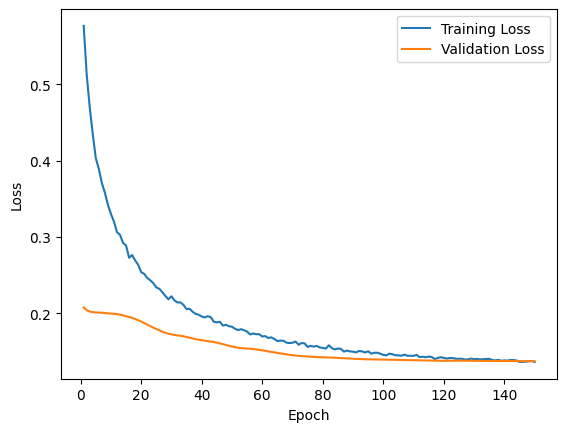

Training complete.
Test Loss: 0.13294291496276855
Real Gene Expression for the First 10 Cells:
[[0.        1.0986123 0.        1.0986123 0.       ]
 [0.6931472 0.        0.        0.        0.       ]
 [0.6931472 0.        0.        0.        0.       ]
 [0.6931472 0.        0.        0.        0.       ]
 [0.6931472 0.        0.        0.        0.       ]
 [1.0986123 0.        0.        0.        0.       ]
 [1.9459101 0.        0.        0.        0.       ]
 [1.3862944 0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.6931472 0.        0.        0.       ]]

Predicted Gene Expression for the First 10 Cells:
[[0.16249423 0.11377338 0.06379608 0.09678629 0.04665623]
 [0.33109245 0.28049487 0.07985853 0.13475958 0.03935435]
 [0.16249423 0.11377338 0.06379608 0.09678629 0.04665623]
 [0.4047278  0.15497826 0.08090683 0.12029871 0.04280663]
 [0.32601908 0.17364144 0.08829386 0.08895067 0.06694054]
 [0.33109245 0.28049487 0.0798585

0.13294291496276855

In [ ]:
#IMTIYAZ VERSION 3 - Updated code to use a single model to be able to learn from other genes; still working with paired data (RNA+ATAC) rather than pools of data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

#comment out if it is already loaded
df = pd.read_csv('/content/sample data - Sheet1.csv') #change file path to what you have


class PairedCNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, dropout_rate=0.2, num_genes=5):
        super(PairedCNNModel, self).__init__()

        self.input_size = input_size  # Set input size during initialization

        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=0)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=0)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.pool2 = nn.MaxPool1d(2)

        self.fc1 = nn.Linear(64, hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(dropout_rate)

        # Embedding layer for gene identity
        self.embedding = nn.Embedding(num_genes, hidden_size)

        # Linear layers for gene-specific information
        self.fc_gene = nn.Linear(1, hidden_size)
        self.batch_norm_gene = nn.BatchNorm1d(hidden_size)
        self.dropout_gene = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size + 1, 5)


    def forward(self, x, a):
        x = x.permute(0, 2, 1)

        # Convolutional layers
        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = self.pool2(x)

        # Flatten the output
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.batch_norm3(x)
        x = self.dropout3(x)

        # Process gene-specific information
        a = a.squeeze(dim=-1)
        a_embedding = self.embedding(a.long())
        a_embedding = a_embedding.squeeze(dim=1)
        a_embedding = F.relu(a_embedding)

        # Concatenate shared and gene-specific information
        x = torch.cat([x,a], dim=1)

        # Final linear layer
        x = self.fc2(x)

        return x.view(x.size(0), -1)

class GeneExpressionPredictor:
    def __init__(self, df):
        self.df = df
        self.X_train_tensor = None
        self.y_train_tensor = None
        self.X_val_tensor = None
        self.y_val_tensor = None
        self.X_test_tensor = None
        self.y_test_tensor = None

        self.weight_tensor = None #weight

    def preprocess_data(self):
        # Specify additional features for each cell
        additional_features = ['age_group', 'sex']

        # Use DataFrame to get additional categorical features
        additional_categorical_features = list(set(additional_features) & set(self.df.columns))

        # Fill missing values in specific columns with a default value (e.g., 0)
        #default_value = 0
        #self.df.fillna(default_value, inplace=True)


        # Identify chromatin accessibility columns
        chromatin_accessibility_columns = self.df.filter(like='_ChromatinAccessibility').columns

        # Combine all feature names (numeric, categorical, and additional features)
        feature_columns = chromatin_accessibility_columns.union(additional_categorical_features)

        # Select features and target features
        X = self.df[feature_columns].copy()
        y = self.df.filter(like='_Expression').copy()

        # Convert categorical columns to one-hot encoding
        X = pd.get_dummies(X, columns=additional_categorical_features)

        # Train-validation-test split
        X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

        # Reshape input data for CNN
        self.X_train_tensor = torch.tensor(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), dtype=torch.float32)
        self.y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

        # Give less weight to missing values
        missing_mask_train = X_train.isnull().astype(int)
        weight_tensor = torch.ones_like(self.y_train_tensor)  # Initialize with ones
        weight_tensor[missing_mask_train.values] = 0.5  # Assign lower weights to missing values
        self.weight_tensor = weight_tensor

        self.X_val_tensor = torch.tensor(X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1), dtype=torch.float32)
        self.y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

        self.X_test_tensor = torch.tensor(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), dtype=torch.float32)
        self.y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

    def train_model(self, hidden_size=128, dropout_rate=0.2, epochs=150):
        input_size = self.X_train_tensor.shape[1]

        model = PairedCNNModel(input_size=input_size, hidden_size=hidden_size, dropout_rate=dropout_rate)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Store the training and validation loss for plotting
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            # Training
            model.train()
            optimizer.zero_grad()
            outputs = model(self.X_train_tensor, self.X_train_tensor[:, -1:, -1:])
            #loss = criterion(outputs, self.y_train_tensor)
            loss = torch.mean(self.weight_tensor * (outputs - self.y_train_tensor) ** 2) #loss with weights
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

            # Validation
            model.eval()
            with torch.no_grad():
                val_outputs = model(self.X_val_tensor, self.X_val_tensor[:, -1:, -1:])
                val_loss = criterion(val_outputs, self.y_val_tensor)
                val_losses.append(val_loss.item())

            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

        # Plot the training and validation loss
        plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
        plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        print("Training complete.")
        self.model = model


    def evaluate_model(self):
        if self.model is None:
            print("Model not trained. Please train the model before evaluation.")
            return

        model = self.model.eval()
        criterion = nn.MSELoss()

        # Evaluate on the test set
        with torch.no_grad():
            test_outputs = model(self.X_test_tensor, self.X_test_tensor[:, -1:, :])
            test_loss = criterion(test_outputs, self.y_test_tensor)

        print(f'Test Loss: {test_loss.item()}')

        # Print real-world and predicted gene expression for the first 10 cells
        real_gene_expression = self.y_test_tensor[:10].detach().numpy()
        predicted_gene_expression = test_outputs[:10].detach().numpy()

        print("Real Gene Expression for the First 10 Cells:")
        print(real_gene_expression)

        print("\nPredicted Gene Expression for the First 10 Cells:")
        print(predicted_gene_expression)


        return test_loss.item()

# Load the data
df = pd.read_csv('sample data - Sheet1.csv')

# Create an instance of GeneExpressionPredictor
gene_predictor = GeneExpressionPredictor(df)

# Preprocess the data
gene_predictor.preprocess_data()

# Train the model
gene_predictor.train_model()

# Evaluate the model
gene_predictor.evaluate_model()


The above code is limited in that there are a number of zeroes and the model is not able to predict them well. It is also only based on 5 genes, so it may generalize better with more data. Next step is to implement weights to account for the zeroes.

Welcome. Using scGenePredix to train the model.
Training in progress...
Epoch 10/100, Training Loss: 0.207123801112175, Validation Loss: 0.1674545407295227
Epoch 20/100, Training Loss: 0.15232199430465698, Validation Loss: 0.18257339298725128
Epoch 30/100, Training Loss: 0.13260908424854279, Validation Loss: 0.10554434359073639
Epoch 40/100, Training Loss: 0.11794862151145935, Validation Loss: 0.0719032734632492
Epoch 50/100, Training Loss: 0.1080954298377037, Validation Loss: 0.06256715208292007
Epoch 70/100, Training Loss: 0.08971282839775085, Validation Loss: 0.0525813102722168
Epoch 80/100, Training Loss: 0.08317898958921432, Validation Loss: 0.049109846353530884
Epoch 90/100, Training Loss: 0.07539478689432144, Validation Loss: 0.04517226293683052
Epoch 100/100, Training Loss: 0.07001281529664993, Validation Loss: 0.04196983948349953


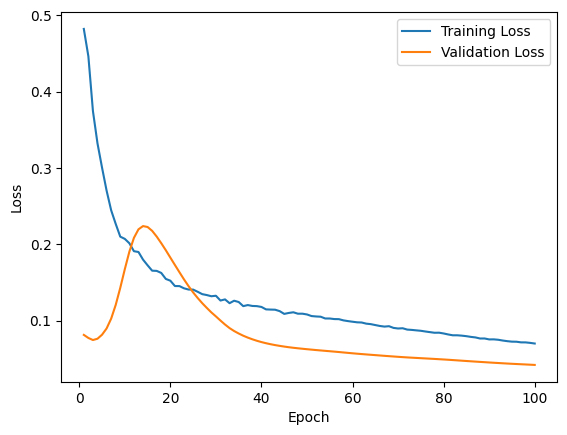

Training complete.
Trained model saved to 'trained_model_oligodendroyctes.pth'
Test Loss: 0.04126623272895813


0.04126623272895813

In [ ]:
#IMTIYAZ VERSION 4 - Training and validating model on dataset (oligodendrocytes, all genes on X chr)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

#comment out if it is already loaded
df = pd.read_csv('/finaldataset_oligodendrocytes.csv') #change file path to what you have


class PairedCNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, dropout_rate=0.2, num_genes=652):
        super(PairedCNNModel, self).__init__()

        self.input_size = input_size  # Set input size during initialization

        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=0)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=0)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.pool2 = nn.MaxPool1d(2)

        self.fc1 = nn.Linear(10432, hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(dropout_rate)

        # Embedding layer for gene identity
        self.embedding = nn.Embedding(num_genes, hidden_size)

        # Linear layers for gene-specific information
        self.fc_gene = nn.Linear(1, hidden_size)
        self.batch_norm_gene = nn.BatchNorm1d(hidden_size)
        self.dropout_gene = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size + 1, 652)


    def forward(self, x, a):
        x = x.permute(0, 2, 1)

        # Convolutional layers
        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = self.pool2(x)

        # Flatten the output
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.batch_norm3(x)
        x = self.dropout3(x)

        # Process gene-specific information
        a = a.squeeze(dim=-1)
        a_embedding = self.embedding(a.long())
        a_embedding = a_embedding.squeeze(dim=1)
        a_embedding = F.relu(a_embedding)

        # Concatenate shared and gene-specific information
        x = torch.cat([x,a], dim=1)

        # Final linear layer
        x = self.fc2(x)

        return x.view(x.size(0), -1)

class GeneExpressionPredictor:
    def __init__(self, df):
        self.df = df
        self.X_train_tensor = None
        self.y_train_tensor = None
        self.X_val_tensor = None
        self.y_val_tensor = None
        self.X_test_tensor = None
        self.y_test_tensor = None

        self.weight_tensor = None #weight

    def preprocess_data(self):
        # Specify additional features for each cell
        additional_features = ['age_group', 'sex']

        # Use DataFrame to get additional categorical features
        additional_categorical_features = list(set(additional_features) & set(self.df.columns))

        # Fill missing values in specific columns with a default value (e.g., 0)
        #default_value = 0
        #self.df.fillna(default_value, inplace=True)


        # Identify chromatin accessibility columns
        chromatin_accessibility_columns = self.df.filter(like='_ChromatinAccessibility').columns

        # Combine all feature names (numeric, categorical, and additional features)
        feature_columns = chromatin_accessibility_columns.union(additional_categorical_features)

        # Select features and target features
        X = self.df[feature_columns].copy()
        y = self.df.filter(like='_Expression').copy()

        # Convert categorical columns to one-hot encoding
        X = pd.get_dummies(X, columns=additional_categorical_features)

        # Train-validation-test split
        X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

        # Reshape input data for CNN
        self.X_train_tensor = torch.tensor(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), dtype=torch.float32)
        self.y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

        # Give less weight to missing values
        missing_mask_train = X_train.isnull().astype(int)
        weight_tensor = torch.ones_like(self.y_train_tensor)  # Initialize with ones
        weight_tensor[missing_mask_train.values] = 0.5  # Assign lower weights to missing values
        self.weight_tensor = weight_tensor

        self.X_val_tensor = torch.tensor(X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1), dtype=torch.float32)
        self.y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

        self.X_test_tensor = torch.tensor(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), dtype=torch.float32)
        self.y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

        # Save the test dataset to a CSV file
        test_dataset = pd.concat([self.X_test_tensor.squeeze(), self.y_test_tensor.squeeze()], axis=1)
        test_dataset.columns = feature_columns.tolist() + y.columns.tolist()
        test_dataset.to_csv(save_test_csv, index=False)

        print(f'Test dataset saved to {save_test_csv}')

    def train_model(self, hidden_size=128, dropout_rate=0.2, epochs=100):
        print("Welcome. Using scGenePredix to train the model.")
        input_size = self.X_train_tensor.shape[1]

        model = PairedCNNModel(input_size=input_size, hidden_size=hidden_size, dropout_rate=dropout_rate)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Store the training and validation loss for plotting
        train_losses = []
        val_losses = []

        print("Training in progress...")

        for epoch in range(epochs):
            # Training
            model.train()
            optimizer.zero_grad()
            outputs = model(self.X_train_tensor, self.X_train_tensor[:, -1:, -1:])
            #loss = criterion(outputs, self.y_train_tensor)
            loss = torch.mean(self.weight_tensor * (outputs - self.y_train_tensor) ** 2) #loss with weights
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

            # Validation
            model.eval()
            with torch.no_grad():
                val_outputs = model(self.X_val_tensor, self.X_val_tensor[:, -1:, -1:])
                val_loss = criterion(val_outputs, self.y_val_tensor)
                val_losses.append(val_loss.item())

            if (epoch + 1) % 10 == 0:
              print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

        # Plot the training and validation loss
        plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
        plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        print("Training complete.")
        torch.save(model.state_dict(), 'trained_model_oligodendroyctes.pth')
        print("Trained model saved to 'trained_model_oligodendroyctes.pth'")
        self.model = model


    def evaluate_model(self):
        if self.model is None:
            print("Model not trained. Please train the model before evaluation.")
            return

        model = self.model.eval()
        criterion = nn.MSELoss()

        # Evaluate on the test set
        with torch.no_grad():
            test_outputs = model(self.X_test_tensor, self.X_test_tensor[:, -1:, :])
            test_loss = criterion(test_outputs, self.y_test_tensor)

        print(f'Test Loss: {test_loss.item()}')

        # Print real-world and predicted gene expression for the first 10 cells
        real_gene_expression = self.y_test_tensor.detach().numpy()
        predicted_gene_expression = test_outputs.detach().numpy()

        #print("Real Gene Expression for the First 10 Cells:")
        #print(real_gene_expression)

        #print("\nPredicted Gene Expression for the First 10 Cells:")
        #print(predicted_gene_expression)


        return test_loss.item()

# Load the data
#df = pd.read_csv('sample data - Sheet1.csv')

# Create an instance of GeneExpressionPredictor
gene_predictor = GeneExpressionPredictor(df)

# Preprocess the data
gene_predictor.preprocess_data()

# Train the model
gene_predictor.train_model()

# Evaluate the model
gene_predictor.evaluate_model()


Welcome. Using scGenePredix to train the model.
Training in progress...
Epoch 10/100, Training Loss: 0.18405351042747498, Validation Loss: 6.907622814178467
Epoch 20/100, Training Loss: 0.1112041249871254, Validation Loss: 0.15610316395759583
Epoch 30/100, Training Loss: 0.09360269457101822, Validation Loss: 0.09680071473121643
Epoch 40/100, Training Loss: 0.08381722122430801, Validation Loss: 0.07543222606182098
Epoch 50/100, Training Loss: 0.07549668103456497, Validation Loss: 0.06207575649023056
Epoch 60/100, Training Loss: 0.06766776740550995, Validation Loss: 0.053892988711595535
Epoch 70/100, Training Loss: 0.061119090765714645, Validation Loss: 0.04932181164622307
Epoch 80/100, Training Loss: 0.0557955764234066, Validation Loss: 0.045482710003852844
Epoch 90/100, Training Loss: 0.05129629373550415, Validation Loss: 0.04260258004069328
Epoch 100/100, Training Loss: 0.048094913363456726, Validation Loss: 0.04014135152101517


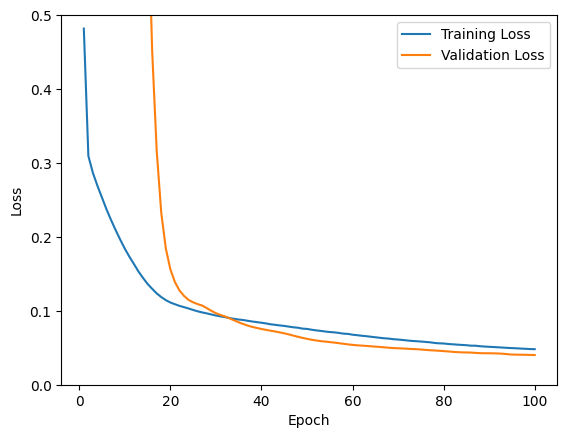

Training complete.
Trained model saved to 'trained_model_oligodendroyctes.pth'
Test Loss: 0.03943661227822304


0.03943661227822304

In [ ]:
#IMTIYAZ VERSION 5 - Training and validating model on final dataset after incorporating start, stop coordinates (oligodendrocytes, all genes on X chr)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

#comment out if it is already loaded
df = pd.read_csv('finaldataset_oligodendrocytes.csv')


class PairedCNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, dropout_rate=0.2, num_genes=652):
        super(PairedCNNModel, self).__init__()

        self.input_size = input_size  # Set input size during initialization

        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=0)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=0)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.pool2 = nn.MaxPool1d(2)

        self.fc1 = nn.Linear(31296, hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(dropout_rate)

        # Embedding layer for gene identity
        self.embedding = nn.Embedding(num_genes, hidden_size)

        # Linear layers for gene-specific information
        self.fc_gene = nn.Linear(1, hidden_size)
        self.batch_norm_gene = nn.BatchNorm1d(hidden_size)
        self.dropout_gene = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size + 1, 652)


    def forward(self, x, a):
        x = x.permute(0, 2, 1)

        # Convolutional layers
        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = self.pool2(x)

        # Flatten the output
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.batch_norm3(x)
        x = self.dropout3(x)

        # Process gene-specific information
        a = a.squeeze(dim=-1)
        a_embedding = self.embedding(a.long())
        a_embedding = a_embedding.squeeze(dim=1)
        a_embedding = F.relu(a_embedding)

        # Concatenate shared and gene-specific information
        x = torch.cat([x,a], dim=1)

        # Final linear layer
        x = self.fc2(x)

        return x.view(x.size(0), -1)

class GeneExpressionPredictor:
    def __init__(self, df):
        self.df = df
        self.X_train_tensor = None
        self.y_train_tensor = None
        self.X_val_tensor = None
        self.y_val_tensor = None
        self.X_test_tensor = None
        self.y_test_tensor = None

        self.weight_tensor = None #weight

    def preprocess_data(self):
        # Specify additional features for each cell
        additional_features = ['age_group', 'sex']

        # Use DataFrame to get additional categorical features
        additional_categorical_features = list(set(additional_features))

        # Fill missing values in specific columns with a default value (e.g., 0)
        #default_value = 0
        #self.df.fillna(default_value, inplace=True)


        # Identify chromatin accessibility columns
        chromatin_accessibility_columns = self.df.filter(like='_ChromatinAccessibility').columns

        # Identify gene start columns
        start_columns = self.df.filter(like='_start_position').columns

        # Identify gene stop columns
        stop_columns = self.df.filter(like='_end_position').columns

        # Combine all feature names (numeric, categorical, and additional features)
        feature_columns = (chromatin_accessibility_columns.union(additional_categorical_features).union(start_columns).union(stop_columns)
)
        # Select features and target features
        X = self.df[feature_columns].copy()
        y = self.df.filter(like='_Expression').copy()

        # Convert categorical columns to one-hot encoding
        X = pd.get_dummies(X, columns=additional_categorical_features)

        # Train-validation-test split
        X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

        # Reshape input data for CNN
        self.X_train_tensor = torch.tensor(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), dtype=torch.float32)
        self.y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

        # Give less weight to missing values
        missing_mask_train = X_train.isnull().astype(int)
        weight_tensor = torch.ones_like(self.y_train_tensor)  # Initialize with ones
        weight_tensor[missing_mask_train.values] = 0.5  # Assign lower weights to missing values
        self.weight_tensor = weight_tensor

        self.X_val_tensor = torch.tensor(X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1), dtype=torch.float32)
        self.y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

        self.X_test_tensor = torch.tensor(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), dtype=torch.float32)
        self.y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

    def train_model(self, hidden_size=128, dropout_rate=0.2, epochs=100):
        print("Welcome. Using scGenePredix to train the model.")
        input_size = self.X_train_tensor.shape[1]

        model = PairedCNNModel(input_size=input_size, hidden_size=hidden_size, dropout_rate=dropout_rate)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Store the training and validation loss for plotting
        train_losses = []
        val_losses = []

        print("Training in progress...")

        for epoch in range(epochs):
            # Training
            model.train()
            optimizer.zero_grad()
            outputs = model(self.X_train_tensor, self.X_train_tensor[:, -1:, -1:])
            #loss = criterion(outputs, self.y_train_tensor)
            loss = torch.mean(self.weight_tensor * (outputs - self.y_train_tensor) ** 2) #loss with weights
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

            # Validation
            model.eval()
            with torch.no_grad():
                val_outputs = model(self.X_val_tensor, self.X_val_tensor[:, -1:, -1:])
                val_loss = criterion(val_outputs, self.y_val_tensor)
                val_losses.append(val_loss.item())

            if (epoch + 1) % 10 == 0:
              print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

        # Plot the training and validation loss
        plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
        plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.ylim(0, 0.5)  # Adjust y-axis limits
        plt.show()

        print("Training complete.")
        torch.save(model.state_dict(), 'trained_model_oligodendroyctes.pth')
        print("Trained model saved to 'trained_model_oligodendroyctes.pth'")
        self.model = model


    def evaluate_model(self):
        if self.model is None:
            print("Model not trained. Please train the model before evaluation.")
            return

        model = self.model.eval()
        criterion = nn.MSELoss()

        # Evaluate on the test set
        with torch.no_grad():
            test_outputs = model(self.X_test_tensor, self.X_test_tensor[:, -1:, :])
            test_loss = criterion(test_outputs, self.y_test_tensor)

        print(f'Test Loss: {test_loss.item()}')

        return test_loss.item()

# Create an instance of GeneExpressionPredictor
gene_predictor = GeneExpressionPredictor(df)

# Preprocess the data
gene_predictor.preprocess_data()

# Train the model
gene_predictor.train_model()

# Evaluate the model
gene_predictor.evaluate_model()


In [ ]:
#Include a step to save the csv file for the test dataset
df = pd.read_csv('finaldataset_oligodendrocytes.csv')
class GeneExpressionPredictor:
    def __init__(self, df):
        self.df = df
        self.X_train_tensor = None
        self.y_train_tensor = None
        self.X_val_tensor = None
        self.y_val_tensor = None
        self.X_test_tensor = None
        self.y_test_tensor = None

        self.weight_tensor = None #weight

    def preprocess_data(self):
        # Specify additional features for each cell
        additional_features = ['age_group', 'sex']

        # Use DataFrame to get additional categorical features
        additional_categorical_features = list(set(additional_features))

        # Fill missing values in specific columns with a default value (e.g., 0)
        #default_value = 0
        #self.df.fillna(default_value, inplace=True)

        # Identify chromatin accessibility columns
        chromatin_accessibility_columns = self.df.filter(like='_ChromatinAccessibility').columns

        # Identify gene start columns
        start_columns = self.df.filter(like='_start_position').columns

        # Identify gene stop columns
        stop_columns = self.df.filter(like='_end_position').columns

        # Combine all feature names (numeric, categorical, and additional features)
        feature_columns = (chromatin_accessibility_columns.union(additional_categorical_features).union(start_columns).union(stop_columns)
)
        # Select features and target features
        X = self.df[feature_columns].copy()
        y = self.df.filter(like='_Expression').copy()

        # Convert categorical columns to one-hot encoding
        X = pd.get_dummies(X, columns=additional_categorical_features)

        # Train-validation-test split
        X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

        # Reshape input data for CNN
        self.X_train_tensor = torch.tensor(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), dtype=torch.float32)
        self.y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

        # Give less weight to missing values
        missing_mask_train = X_train.isnull().astype(int)
        weight_tensor = torch.ones_like(self.y_train_tensor)  # Initialize with ones
        weight_tensor[missing_mask_train.values] = 0.5  # Assign lower weights to missing values
        self.weight_tensor = weight_tensor

        self.X_val_tensor = torch.tensor(X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1), dtype=torch.float32)
        self.y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

        self.X_test_tensor = torch.tensor(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), dtype=torch.float32)
        self.y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

        # Concatenate DataFrames
        test_dataset = pd.concat([X_test, y_test], axis=1)

        # Save the test dataset to a CSV file
        test_dataset.to_csv("final_test.csv", index=False)

        print(f'Test dataset saved to "final_test.csv"')

gene_predictor = GeneExpressionPredictor(df)

gene_predictor.preprocess_data()

In [ ]:
#IMTIYAZ VERSION 5 - Testing code on the test dataset using the trained model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

#comment out if it is already loaded
df = pd.read_csv('final_test.csv')


class PairedCNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=128, dropout_rate=0.2, num_genes=652):
        super(PairedCNNModel, self).__init__()

        self.input_size = input_size  # Set input size during initialization

        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=0)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=0)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.pool2 = nn.MaxPool1d(2)

        self.fc1 = nn.Linear(31296, hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(dropout_rate)

        # Embedding layer for gene identity
        self.embedding = nn.Embedding(num_genes, hidden_size)

        # Linear layers for gene-specific information
        self.fc_gene = nn.Linear(1, hidden_size)
        self.batch_norm_gene = nn.BatchNorm1d(hidden_size)
        self.dropout_gene = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size + 1, 652)


    def forward(self, x, a):
        x = x.permute(0, 2, 1)

        # Convolutional layers
        x = F.relu(self.conv1(x))
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = self.pool2(x)

        # Flatten the output
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.batch_norm3(x)
        x = self.dropout3(x)

        # Process gene-specific information
        a = a.squeeze(dim=-1)
        a_embedding = self.embedding(a.long())
        a_embedding = a_embedding.squeeze(dim=1)
        a_embedding = F.relu(a_embedding)

        # Concatenate shared and gene-specific information
        x = torch.cat([x,a], dim=1)

        # Final linear layer
        x = self.fc2(x)

        return x.view(x.size(0), -1)

class GeneExpressionPredictor:
    def __init__(self, df):
        self.df = df
        self.X_train_tensor = None
        self.y_train_tensor = None
        self.X_val_tensor = None
        self.y_val_tensor = None
        self.X_test_tensor = None
        self.y_test_tensor = None

        self.weight_tensor = None #weight

    def preprocess_data(self):

        # Specify additional features for each cell
        # Identify columns that contain the words "age_group" or "sex"
        selected_feature_columns = self.df.filter(like='age_group').columns.union(self.df.filter(like='sex').columns)

        # Use the selected columns as additional features
        additional_categorical_features = list(set(selected_feature_columns))

        # Identify chromatin accessibility columns
        chromatin_accessibility_columns = self.df.filter(like='_ChromatinAccessibility').columns

        # Identify gene start columns
        start_columns = self.df.filter(like='_start_position').columns

        # Identify gene stop columns
        stop_columns = self.df.filter(like='_end_position').columns

        # Combine all feature names (numeric, categorical, and additional features)
        feature_columns = (chromatin_accessibility_columns.union(additional_categorical_features).union(start_columns).union(stop_columns)
)

        # Select features and target features
        X_test = self.df[feature_columns].copy()
        y_test = self.df.filter(like='_Expression').copy()

        # Reshape data
        self.X_test_tensor = torch.tensor(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), dtype=torch.float32)
        self.y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

    def train_model(self, hidden_size=128, dropout_rate=0.2, epochs=100):
        print("Welcome. Using scGenePredix to train the model.")
        input_size = self.X_train_tensor.shape[1]

        model = PairedCNNModel(input_size=input_size, hidden_size=hidden_size, dropout_rate=dropout_rate)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Store the training and validation loss for plotting
        train_losses = []
        val_losses = []

        print("Training in progress...")

        for epoch in range(epochs):
            # Training
            model.train()
            optimizer.zero_grad()
            outputs = model(self.X_train_tensor, self.X_train_tensor[:, -1:, -1:])
            #loss = criterion(outputs, self.y_train_tensor)
            loss = torch.mean(self.weight_tensor * (outputs - self.y_train_tensor) ** 2) #loss with weights
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

            # Validation
            model.eval()
            with torch.no_grad():
                val_outputs = model(self.X_val_tensor, self.X_val_tensor[:, -1:, -1:])
                val_loss = criterion(val_outputs, self.y_val_tensor)
                val_losses.append(val_loss.item())

            if (epoch + 1) % 10 == 0:
              print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

        # Plot the training and validation loss
        plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
        plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.ylim(0, 0.5)  # Adjust y-axis limits
        plt.show()

        print("Training complete.")
        torch.save(model.state_dict(), 'trained_model_oligodendroyctes.pth')
        print("Trained model saved to 'trained_model_oligodendroyctes.pth'")
        self.model = model

    def load_model(self, model_path='trained_model_oligodendroyctes.pth'):
        # Pass the input_size to the model during initialization
        input_size = 31296
        self.model = PairedCNNModel(input_size=input_size, hidden_size=128, dropout_rate=0.2)
        self.model.load_state_dict(torch.load(model_path))
        self.model.eval()
        print(f"Model loaded from {model_path}")

    def evaluate_model(self):

        model = self.model.eval()
        criterion = nn.MSELoss()

        # Evaluate on the test set
        with torch.no_grad():
            test_outputs = model(self.X_test_tensor, self.X_test_tensor[:, -1:, :])
            test_loss = criterion(test_outputs, self.y_test_tensor)

        print(f'Test Loss: {test_loss.item()}')

        return test_loss.item()


# Create an instance of GeneExpressionPredictor
gene_predictor = GeneExpressionPredictor(df)

# Preprocess the data
gene_predictor.preprocess_data()

# Train the model
#gene_predictor.train_model()

# Load the model
gene_predictor.load_model()

# Evaluate the model
gene_predictor.evaluate_model()


Model loaded from trained_model_oligodendroyctes.pth
Test Loss: 0.03943661227822304


0.03943661227822304